In [1]:
import pandas as pd

# Load the CSV file
file_path = 'multiplication_table_labelling_variables.csv'
df = pd.read_csv(file_path)

# Check for duplicates based on columns 'x1' and 'x2'
duplicates = df.duplicated(subset=['x1', 'x2'], keep=False)
uni=df[~duplicates]
dup=df[duplicates]
operation_table_cleaned = uni.pivot(index='x1', columns='x2', values='y')
op2=operation_table_cleaned.copy()

In [2]:


# Ensuring the table includes all values between 0 and 6
#operation_table_cleaned = operation_table_cleaned.reindex(index=range(7), columns=range(7), fill_value=-1)

# Fill missing values with NaN for easier error handling
#operation_table_cleaned = operation_table_cleaned.replace(-1, pd.NA)

In [3]:
op2=operation_table_cleaned.copy()
op3=operation_table_cleaned.copy()

In [6]:
op2

x2,0,1,2,3,4,5,6
x1,,,,,,,
0,NaN,4.0,1.0,NaN,2.0,NaN,NaN
1,NaN,NaN,5.0,2.0,NaN,3.0,NaN
2,NaN,NaN,NaN,6.0,3.0,NaN,4.0
3,5.0,NaN,NaN,NaN,0.0,4.0,NaN
4,NaN,6.0,NaN,NaN,NaN,1.0,5.0
5,6.0,NaN,0.0,NaN,NaN,NaN,2.0
6,3.0,0.0,NaN,1.0,NaN,NaN,NaN


In [5]:
op2.to_csv("doubly_mult_table.csv",index=True)

In [39]:
op2.isnull().sum(axis=1).tolist()

[4, 4, 4, 4, 4, 4, 4]

In [40]:
operation_table_cleaned.loc[0,6]=3
operation_table_cleaned.loc[0,3]=5
operation_table_cleaned.loc[1,4]=6
operation_table_cleaned.loc[2,5]=0
operation_table_cleaned.loc[3,6]=1
operation_table_cleaned.loc[0,5]=6
operation_table_cleaned.loc[1,6]=0
operation_table_cleaned.loc[2,1]=5
operation_table_cleaned.loc[3,2]=6
operation_table_cleaned.loc[4,3]=0
operation_table_cleaned.loc[5,4]=1
operation_table_cleaned.loc[4,0]=2
operation_table_cleaned.loc[5,1]=3
operation_table_cleaned.loc[6,2]=4
operation_table_cleaned.loc[2,0]=1
operation_table_cleaned.loc[3,1]=2
operation_table_cleaned.loc[4,2]=3
operation_table_cleaned.loc[5,3]=4
operation_table_cleaned.loc[6,4]=5
operation_table_cleaned.loc[1,0]=4
operation_table_cleaned.loc[6,5]=2
operation_table_cleaned.loc[0,0]=0
operation_table_cleaned.loc[1,1]=1
operation_table_cleaned.loc[2,2]=2
operation_table_cleaned.loc[3,3]=3
operation_table_cleaned.loc[4,4]=4
operation_table_cleaned.loc[5,5]=5
operation_table_cleaned.loc[6,6]=6

In [41]:
operation_table_cleaned

x2,0,1,2,3,4,5,6
x1,,,,,,,
0,0.0,4.0,1.0,5.0,2.0,6.0,3.0
1,4.0,1.0,5.0,2.0,6.0,3.0,0.0
2,1.0,5.0,2.0,6.0,3.0,0.0,4.0
3,5.0,2.0,6.0,3.0,0.0,4.0,1.0
4,2.0,6.0,3.0,0.0,4.0,1.0,5.0
5,6.0,3.0,0.0,4.0,1.0,5.0,2.0
6,3.0,0.0,4.0,1.0,5.0,2.0,6.0


In [43]:
df_int = operation_table_cleaned.astype(int)
df_int.to_csv("multiplication_symmetric.csv",index=False,sep=" ", header=False)

In [190]:
import pandas as pd

# Load the CSV file
file_path = 'multiplication_table_labelling_variables.csv'
df = pd.read_csv(file_path)

# Check for duplicates based on columns 'x1' and 'x2'
duplicates = df.duplicated(subset=['x1', 'x2'], keep=False)
uni=df[~duplicates]
dup=df[duplicates]
operation_table_cleaned = uni.pivot(index='x1', columns='x2', values='y')
op2=operation_table_cleaned.copy()

dup2=dup.sort_values(["x1","x2","y"])

string=[0]*21

new_string=[]
for indi, info in enumerate(string):
    if info==1:
        new_string.append("None")
        new_string.append("1")
    else:
        new_string.append("0")
        new_string.append("None")

dup2["code"]=new_string
dup3=dup2[~(dup2["code"]=="None")]

for ind, info in dup3.iterrows():
    op2.loc[info.x1, info.x2]=info.y

op2.loc[0,0]=0
op2.loc[1,1]=1
op2.loc[2,2]=2
op2.loc[3,3]=3
op2.loc[4,4]=4
op2.loc[5,5]=5
op2.loc[6,6]=6

op2_int = op2.astype(int)

def operation(a, b):
    return op2_int.loc[a, b]

# Testing the equation for all x, y, z in {0, 1, 2, 3, 4, 5, 6}
results = []

for x in range(7):
    for y in range(7):
        for z in range(7):
            lhs = x
            opa=operation(y, x)
            opb=operation(x, operation(z, y))
            opc=operation(z, y)
            rhs = operation(operation(y, x), operation(x, operation(z, y)))
            results.append({
                'x': x,
                'y': y,
                'z': z,
                'LHS (x)': lhs,
                'opa': opa,
                'opb': opb,
                'opc': opc,
                'RHS': rhs,
                'Holds': lhs == rhs
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df["Holds"].value_counts()

op2_int.to_csv("new_multiplication_table_op2.csv",index=False,sep=" ")
output_file_path = 'equation_results_op2.csv'
results_df.to_csv(output_file_path, index=False)

True     174
False    169
Name: Holds, dtype: int64

In [194]:
op2

x2,0,1,2,3,4,5,6
x1,,,,,,,
0,0.0,4.0,1.0,1.0,2.0,1.0,2.0
1,3.0,1.0,5.0,2.0,2.0,3.0,2.0
2,3.0,4.0,2.0,6.0,3.0,3.0,4.0
3,5.0,0.0,0.0,3.0,0.0,4.0,4.0
4,5.0,6.0,1.0,1.0,4.0,1.0,5.0
5,6.0,0.0,0.0,2.0,0.0,5.0,2.0
6,3.0,0.0,0.0,1.0,0.0,1.0,6.0


,x1,x2,y,code
2,0,3,1,0
5,0,5,1,0
7,0,6,2,0
9,1,0,3,0
13,1,4,2,0
16,1,6,2,0
18,2,0,3,0
20,2,1,4,0
25,2,5,3,0
28,3,1,0,0


True     174
False    169
Name: Holds, dtype: int64

In [30]:
import pandas as pd

# Load the CSV file
file_path = 'multiplication_table_labelling_variables.csv'
df = pd.read_csv(file_path)

# Remove duplicates based on 'x1' and 'x2'
unique_df = df.drop_duplicates(subset=['x1', 'x2'])

# Pivot the unique values to create the operation table
operation_table_cleaned = unique_df.pivot(index='x1', columns='x2', values='y').copy()

# Handle duplicates and create the 'code' column based on a fixed pattern
duplicates = df[df.duplicated(subset=['x1', 'x2'], keep=False)].sort_values(["x1", "x2", "y"])
code_pattern = generate_code_pattern([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])#['0', 'None'] * 21  # Repeating the pattern [0, None]
duplicates['code'] = code_pattern[:len(duplicates)]
filtered_duplicates = duplicates[duplicates['code'] != 'None']

# Update operation table with values from duplicates
for _, row in filtered_duplicates.iterrows():
    operation_table_cleaned.loc[row.x1, row.x2] = row.y

# Set diagonal values in the operation table
for i in range(7):
    operation_table_cleaned.loc[i, i] = 0

# Convert the operation table to integers
operation_table_int = operation_table_cleaned.astype(int)

# Define the operation function
def operation(a, b):
    return operation_table_int.loc[a, b]

# Test the equation for all x, y, z in {0, 1, 2, 3, 4, 5, 6}
results = []
for x in range(7):
    for y in range(7):
        for z in range(7):
            lhs = x
            rhs = operation(operation(y, x), operation(x, operation(z, y)))
            results.append({
                'x': x,
                'y': y,
                'z': z,
                'LHS (x)': x,
                'opa': operation(y, x),
                'opb': operation(x, operation(z, y)),
                'opc': operation(z, y),
                'RHS': rhs,
                'Holds': lhs == rhs
            })

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('equation_results_op2.csv', index=False)

# Save the cleaned operation table
operation_table_int.to_csv("new_multiplication_table_op2.csv", index=False, sep=" ")

In [9]:
results_df["Holds"].value_counts()

True     206
False    137
Name: Holds, dtype: int64

In [4]:
import pandas as pd
import itertools

# Load the CSV file
file_path = 'multiplication_table_labelling_variables.csv'
df = pd.read_csv(file_path)

# Remove duplicates based on 'x1' and 'x2'
unique_df = df.drop_duplicates(subset=['x1', 'x2'])

# Pivot the unique values to create the operation table
operation_table_cleaned = unique_df.pivot(index='x1', columns='x2', values='y').copy()

# Handle duplicates and prepare binary strings with None
duplicates = df[df.duplicated(subset=['x1', 'x2'], keep=False)].sort_values(["x1", "x2", "y"])

# Function to convert a 21-length binary string into a 42-length pattern with 'None'
def generate_code_pattern(binary_string):
    code_pattern = []
    for bit in binary_string:
        if bit == '1':
            # If the bit is 1, append None first, then the bit
            code_pattern.append('None')
            code_pattern.append(bit)
        else:
            # If the bit is 0, append the bit first, then None
            code_pattern.append(bit)
            code_pattern.append('None')
    return code_pattern

# Function to calculate results for a given binary string
def calculate_results_for_pattern(binary_string):
    # Generate the 42-length code pattern
    code_pattern = generate_code_pattern(binary_string)
    
    # Assign the current code pattern to the 'code' column for duplicates
    duplicates['code'] = code_pattern[:len(duplicates)]
    
    # Filter duplicates where 'code' is not 'None'
    filtered_duplicates = duplicates[duplicates['code'] != 'None']
    
    # Create a copy of the operation table to modify
    operation_table_int = operation_table_cleaned.copy()
    
    # Update operation table with values from filtered duplicates
    for _, row in filtered_duplicates.iterrows():
        operation_table_int.loc[row.x1, row.x2] = row.y
    
    # Set diagonal values in the operation table
    for i in range(7):
        operation_table_int.loc[i, i] = i
    
    # Convert the operation table to integers
    operation_table_int = operation_table_int.astype(int)
    
    # Define the operation function
    def operation(a, b):
        return operation_table_int.loc[a, b]
    
    # Test the equation for all x, y, z in {0, 1, 2, 3, 4, 5, 6}
    results = []
    for x in range(7):
        for y in range(7):
            for z in range(7):
                lhs = x
                rhs = operation(operation(y, x), operation(x, operation(z, y)))
                results.append(lhs == rhs)

    # Return the counts of True and False
    return results.count(True), results.count(False)

# Generate all 21-length binary strings (2^21 possibilities)
binary_strings = [''.join(seq) for seq in itertools.product('01', repeat=21)]

# Store results in a DataFrame
results_data = []
for binary_string in binary_strings:
    true_count, false_count = calculate_results_for_pattern(binary_string)
    results_data.append({
        'Binary String': binary_string,
        'Holds True': true_count,
        'Holds False': false_count
    })

# Convert the results to a DataFrame and save to CSV
results_df = pd.DataFrame(results_data)
results_df.to_csv('binary_string_results.csv', index=False)

KeyboardInterrupt: 

In [26]:
import pandas as pd
import itertools
from tqdm.notebook import tqdm  # Use tqdm for the progress bar in Jupyter

# Load the CSV file
file_path = 'multiplication_table_labelling_variables.csv'
df = pd.read_csv(file_path)

# Remove duplicates based on 'x1' and 'x2'
unique_df = df.drop_duplicates(subset=['x1', 'x2'])

# Pivot the unique values to create the operation table
operation_table_cleaned = unique_df.pivot(index='x1', columns='x2', values='y').copy()

# Handle duplicates and prepare binary strings with None
duplicates = df[df.duplicated(subset=['x1', 'x2'], keep=False)].sort_values(["x1", "x2", "y"])

# Function to convert a 21-length binary string into a 42-length pattern with 'None'
def generate_code_pattern(binary_string):
    code_pattern = []
    for bit in binary_string:
        if bit == '1':
            # If the bit is 1, append None first, then the bit
            code_pattern.append('None')
            code_pattern.append(bit)
        else:
            # If the bit is 0, append the bit first, then None
            code_pattern.append(bit)
            code_pattern.append('None')
    return code_pattern

# Function to calculate results for a given binary string
def calculate_results_for_pattern(binary_string):
    # Generate the 42-length code pattern
    code_pattern = generate_code_pattern(binary_string)
    
    # Assign the current code pattern to the 'code' column for duplicates
    duplicates['code'] = code_pattern[:len(duplicates)]
    
    # Filter duplicates where 'code' is not 'None'
    filtered_duplicates = duplicates[duplicates['code'] != 'None']
    
    # Create a copy of the operation table to modify
    operation_table_int = operation_table_cleaned.copy()
    
    # Update operation table with values from filtered duplicates
    for _, row in filtered_duplicates.iterrows():
        operation_table_int.loc[row.x1, row.x2] = row.y
    
    # Set diagonal values in the operation table
    for i in range(7):
        operation_table_int.loc[i, i] = 0
    
    # Convert the operation table to integers
    operation_table_int = operation_table_int.astype(int)
    
    # Define the operation function
    def operation(a, b):
        return operation_table_int.loc[a, b]
    
    # Test the equation for all x, y, z in {0, 1, 2, 3, 4, 5, 6}
    results = []
    for x in range(7):
        for y in range(7):
            for z in range(7):
                lhs = x
                rhs = operation(operation(y, x), operation(x, operation(z, y)))
                results.append(lhs == rhs)

    # Return the counts of True and False
    return results.count(True), results.count(False)

# Generate all 21-length binary strings (2^21 possibilities)
binary_strings = [''.join(seq) for seq in itertools.product('01', repeat=21)]

# Store results in a DataFrame
results_data = []

# Wrap the loop with tqdm for progress tracking
for binary_string in tqdm(binary_strings, desc="Processing binary strings"):
    true_count, false_count = calculate_results_for_pattern(binary_string)
    results_data.append({
        'Binary String': binary_string,
        'Holds True': true_count,
        'Holds False': false_count
    })

Processing binary strings:   0%|          | 0/2097152 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [27]:
# Convert the results to a DataFrame and save to CSV
results_df = pd.DataFrame(results_data)
results_df.to_csv('binary_string_results.csv', index=False)

In [29]:
results_df.sort_values("Holds True")

,Binary String,Holds True,Holds False
3312,000000000110011110000,117,226
3280,000000000110011010000,124,219
3316,000000000110011110100,126,217
2288,000000000100011110000,128,215
7408,000000001110011110000,128,215
...,...,...,...
5423,000000001010100101111,206,137
7471,000000001110100101111,207,136
3887,000000000111100101111,207,136
6439,000000001100100100111,208,135


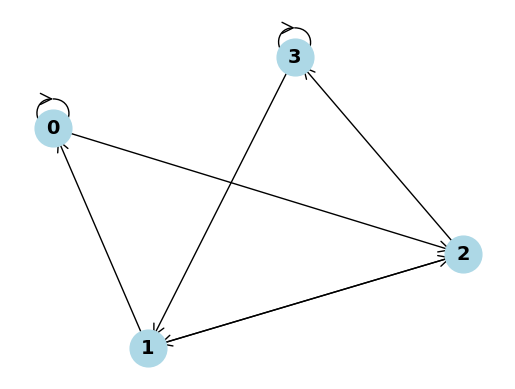

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges of the graph
edges = [
    (0, 0), (0, 2),
    (1, 0), (1, 2),
    (2, 1), (2, 3),
    (3, 1), (3, 3)
]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)

# Define positions for all nodes using a layout
pos = nx.spring_layout(G)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

# Remove axes for clarity
plt.axis('off')

# Display the graph
plt.show()

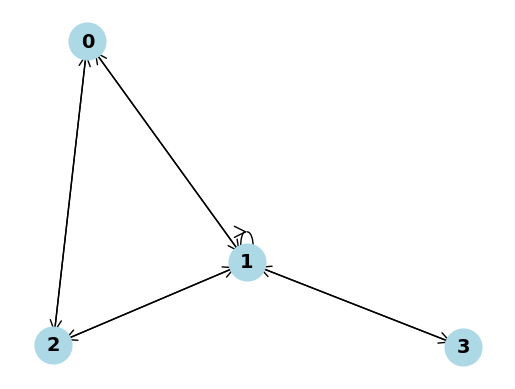

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph_from_multiplication_table(M):
    """
    Constructs and plots a graph based on the given multiplication table M.

    Parameters:
    - M: A list of lists representing the multiplication table.
         M[i][j] represents the result of i * j.

    The nodes are from 0 to n-1, where n is the size of the multiplication table.
    Edges are added such that for each pair (i, j), there is an edge from i to (i * j) and from (i * j) to j.
    """
    n = len(M)  # Number of nodes
    edges = set()

    # Construct edges based on the multiplication table
    for i in range(n):
        for j in range(n):
            k = M[i][j]  # Compute i * j
            edges.add((i, k))
            edges.add((k, j))

    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    G.add_edges_from(edges)

    # Define positions for all nodes using a layout
    pos = nx.spring_layout(G)

    # Draw nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    # Draw edges with arrows
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

    # Remove axes for clarity
    plt.axis('off')

    # Display the graph
    plt.show()

# Example usage:

# Define an arbitrary multiplication table
#M = [
#    [0, 2, 0, 2],
#    [0, 2, 0, 2],
#    [1, 3, 1, 3],
#    [1, 3, 1, 3]
#]
M=[[2, 2, 1, 1], [2, 3, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1]]
# Call the function to plot the graph
plot_graph_from_multiplication_table(M)

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import ast

def plot_graph_from_multiplication_table(M, table_index):
    """
    Constructs and plots a graph based on the given multiplication table M.

    Parameters:
    - M: A list of lists representing the multiplication table.
         M[i][j] represents the result of i * j.
    - table_index: An integer representing the index of the multiplication table (used for saving plots).
    """
    n = len(M)  # Number of nodes
    edges = set()

    # Construct edges based on the multiplication table
    for i in range(n):
        for j in range(n):
            k = M[i][j]  # Compute i * j
            edges.add((i, k))
            edges.add((k, j))

    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    G.add_edges_from(edges)

    # Define positions for all nodes using a layout
    pos = nx.spring_layout(G, seed=42)  # Fixed seed for consistent layout

    # Draw nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    # Draw edges with arrows
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

    # Remove axes for clarity
    plt.axis('off')

    # Save the graph to a file
    plt.savefig(f'graph_{table_index}.png')
    plt.close()

def read_multiplication_tables_from_file(filename):
    """
    Reads multiplication tables from a file, one per row, where each table is in list format.

    Parameters:
    - filename: The name of the file containing multiplication tables.

    Returns:
    - A list of multiplication tables, where each table is a list of lists.
    """
    multiplication_tables = []
    with open(filename, 'r') as file:
        for line_number, line in enumerate(file, 1):
            try:
                # Safely evaluate the line as a Python literal (list of lists)
                M = ast.literal_eval(line.strip())
                # Validate that M is a list of lists and is square
                if (isinstance(M, list) and all(isinstance(row, list) for row in M)):
                    n = len(M)
                    if all(len(row) == n for row in M):
                        multiplication_tables.append(M)
                    else:
                        print(f"Error on line {line_number}: Not all rows have length {n}.")
                else:
                    print(f"Error on line {line_number}: The line is not a list of lists.")
            except (SyntaxError, ValueError) as e:
                print(f"Error on line {line_number}: {e}")
    return multiplication_tables

def main():
    # File containing multiplication tables (one per row in list format)
    filename = 'magmas4x4.txt'

    # Read multiplication tables from the file
    multiplication_tables = read_multiplication_tables_from_file(filename)

    # Plot each multiplication table
    for index, M in enumerate(multiplication_tables, 1):
        plot_graph_from_multiplication_table(M, index)
        print(f"Graph {index} plotted and saved as 'graph_{index}.png'.")

if __name__ == '__main__':
    main()


Graph 1 plotted and saved as 'graph_1.png'.
Graph 2 plotted and saved as 'graph_2.png'.
Graph 3 plotted and saved as 'graph_3.png'.
Graph 4 plotted and saved as 'graph_4.png'.
Graph 5 plotted and saved as 'graph_5.png'.
Graph 6 plotted and saved as 'graph_6.png'.
Graph 7 plotted and saved as 'graph_7.png'.
Graph 8 plotted and saved as 'graph_8.png'.
Graph 9 plotted and saved as 'graph_9.png'.
Graph 10 plotted and saved as 'graph_10.png'.
Graph 11 plotted and saved as 'graph_11.png'.
Graph 12 plotted and saved as 'graph_12.png'.
Graph 13 plotted and saved as 'graph_13.png'.
Graph 14 plotted and saved as 'graph_14.png'.
Graph 15 plotted and saved as 'graph_15.png'.
Graph 16 plotted and saved as 'graph_16.png'.
Graph 17 plotted and saved as 'graph_17.png'.
Graph 18 plotted and saved as 'graph_18.png'.
Graph 19 plotted and saved as 'graph_19.png'.
Graph 20 plotted and saved as 'graph_20.png'.
Graph 21 plotted and saved as 'graph_21.png'.
Graph 22 plotted and saved as 'graph_22.png'.
Graph 

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import ast

def plot_graph_from_multiplication_table(M, table_index):
    """
    Constructs and plots a graph based on the given multiplication table M.

    Parameters:
    - M: A list of lists representing the multiplication table.
         M[i][j] represents the result of i * j.
    - table_index: An integer representing the index of the multiplication table (used for saving plots).
    """
    n = len(M)  # Number of nodes
    edges = []

    # Construct edges based on the multiplication table
    for i in range(n):
        for j in range(n):
            k = M[i][j]  # Compute i * j
            edges.append((i, k))
            edges.append((k, j))

    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph
    G.add_edges_from(edges)

    # Define positions for all nodes using a layout
    pos = nx.spring_layout(G, seed=42)  # Fixed seed for consistent layout

    # Identify bidirectional and unidirectional edges
    edge_set = set(G.edges())
    bidirectional_edges = set()
    unidirectional_edges = set()

    for (u, v) in edge_set:
        if (v, u) in edge_set:
            # It's a bidirectional edge
            if (v, u) not in bidirectional_edges:
                bidirectional_edges.add((u, v))
        else:
            # Unidirectional edge
            unidirectional_edges.add((u, v))

    # Draw nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue', edgecolors='black', linewidths=1.5)
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    # Draw unidirectional edges (straight lines)
    nx.draw_networkx_edges(
        G, pos,
        edgelist=unidirectional_edges,
        arrowstyle='-|>',
        arrowsize=15,
        edge_color='gray',
        connectionstyle='arc3,rad=0.0'
    )

    # Draw bidirectional edges with positive curvature
    nx.draw_networkx_edges(
        G, pos,
        edgelist=bidirectional_edges,
        arrowstyle='-|>',
        arrowsize=15,
        edge_color='blue',
        connectionstyle='arc3,rad=0.2'
    )

    # Draw the reverse of bidirectional edges with negative curvature
    reverse_bidirectional_edges = [(v, u) for (u, v) in bidirectional_edges]
    nx.draw_networkx_edges(
        G, pos,
        edgelist=reverse_bidirectional_edges,
        arrowstyle='-|>',
        arrowsize=15,
        edge_color='red',
        connectionstyle='arc3,rad=-0.2'
    )

    # Adjust plot margins
    plt.tight_layout()

    # Remove axes for clarity
    plt.axis('off')

    # Save the graph to a file
    plt.savefig(f'graph_{table_index}.png', format='png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.close()

def read_multiplication_tables_from_file(filename):
    """
    Reads multiplication tables from a file, one per row, where each table is in list format.

    Parameters:
    - filename: The name of the file containing multiplication tables.

    Returns:
    - A list of multiplication tables, where each table is a list of lists.
    """
    multiplication_tables = []
    with open(filename, 'r') as file:
        for line_number, line in enumerate(file, 1):
            try:
                # Safely evaluate the line as a Python literal (list of lists)
                M = ast.literal_eval(line.strip())
                # Validate that M is a list of lists and is square
                if (isinstance(M, list) and all(isinstance(row, list) for row in M)):
                    n = len(M)
                    if all(len(row) == n for row in M):
                        multiplication_tables.append(M)
                    else:
                        print(f"Error on line {line_number}: Not all rows have length {n}.")
                else:
                    print(f"Error on line {line_number}: The line is not a list of lists.")
            except (SyntaxError, ValueError) as e:
                print(f"Error on line {line_number}: {e}")
    return multiplication_tables

def main():
    # File containing multiplication tables (one per row in list format)
    filename = 'magmas4x4.txt'

    # Read multiplication tables from the file
    multiplication_tables = read_multiplication_tables_from_file(filename)

    # Plot each multiplication table
    for index, M in enumerate(multiplication_tables, 1):
        plot_graph_from_multiplication_table(M, index)
        print(f"Graph {index} plotted and saved as 'graph_{index}.png'.")

if __name__ == '__main__':
    main()

Graph 1 plotted and saved as 'graph_1.png'.
Graph 2 plotted and saved as 'graph_2.png'.
Graph 3 plotted and saved as 'graph_3.png'.
Graph 4 plotted and saved as 'graph_4.png'.
Graph 5 plotted and saved as 'graph_5.png'.
Graph 6 plotted and saved as 'graph_6.png'.
Graph 7 plotted and saved as 'graph_7.png'.
Graph 8 plotted and saved as 'graph_8.png'.
Graph 9 plotted and saved as 'graph_9.png'.
Graph 10 plotted and saved as 'graph_10.png'.
Graph 11 plotted and saved as 'graph_11.png'.
Graph 12 plotted and saved as 'graph_12.png'.
Graph 13 plotted and saved as 'graph_13.png'.
Graph 14 plotted and saved as 'graph_14.png'.
Graph 15 plotted and saved as 'graph_15.png'.
Graph 16 plotted and saved as 'graph_16.png'.
Graph 17 plotted and saved as 'graph_17.png'.
Graph 18 plotted and saved as 'graph_18.png'.
Graph 19 plotted and saved as 'graph_19.png'.
Graph 20 plotted and saved as 'graph_20.png'.
Graph 21 plotted and saved as 'graph_21.png'.
Graph 22 plotted and saved as 'graph_22.png'.
Graph 

Graph 1 plotted and saved as 'graph_1.png'.
Graph 2 plotted and saved as 'graph_2.png'.
Graph 3 plotted and saved as 'graph_3.png'.
Graph 4 plotted and saved as 'graph_4.png'.
Graph 5 plotted and saved as 'graph_5.png'.
Graph 6 plotted and saved as 'graph_6.png'.
Graph 7 plotted and saved as 'graph_7.png'.
Graph 8 plotted and saved as 'graph_8.png'.
Graph 9 plotted and saved as 'graph_9.png'.
Graph 10 plotted and saved as 'graph_10.png'.
Graph 11 plotted and saved as 'graph_11.png'.
Graph 12 plotted and saved as 'graph_12.png'.
Graph 13 plotted and saved as 'graph_13.png'.
Graph 14 plotted and saved as 'graph_14.png'.
Graph 15 plotted and saved as 'graph_15.png'.
Graph 16 plotted and saved as 'graph_16.png'.
Graph 17 plotted and saved as 'graph_17.png'.
Graph 18 plotted and saved as 'graph_18.png'.
Graph 19 plotted and saved as 'graph_19.png'.
Graph 20 plotted and saved as 'graph_20.png'.
Graph 21 plotted and saved as 'graph_21.png'.
Graph 22 plotted and saved as 'graph_22.png'.
Graph 

KeyboardInterrupt: 

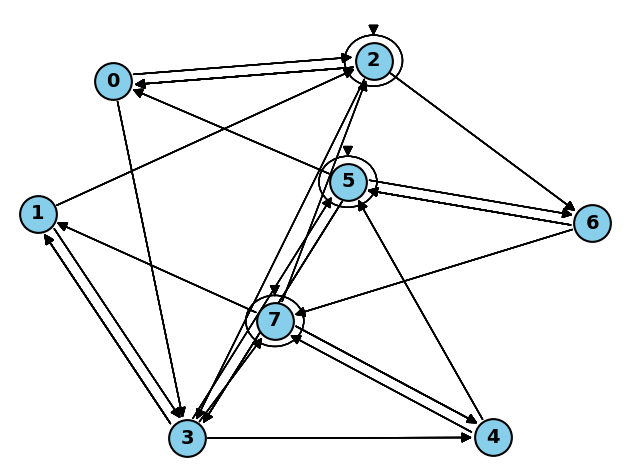

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
from matplotlib.patches import FancyArrowPatch
from collections import defaultdict

def plot_graph_from_multiplication_table(M, table_index):
    """
    Constructs and plots a graph based on the given multiplication table M.

    Parameters:
    - M: A list of lists representing the multiplication table.
         M[i][j] represents the result of i * j.
    - table_index: An integer representing the index of the multiplication table (used for saving plots).
    """
    n = len(M)  # Number of nodes
    edges = []

    # Construct edges based on the multiplication table
    for i in range(n):
        for j in range(n):
            k = M[i][j]  # Compute i * j
            edges.append((i, k))
            edges.append((k, j))

    # Create a MultiDiGraph to allow multiple edges between nodes
    G = nx.MultiDiGraph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges)

    # Define positions for all nodes using a layout
    pos = nx.spring_layout(G, seed=42)  # Fixed seed for consistent layout

    # Draw nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black', linewidths=1.5)
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    ax = plt.gca()

    # Draw edges
    for (u, v, data) in G.edges(data=True):
        # Check if it's a loop
        if u == v:
            # Draw loop as a small circle
            loop_radius = 0.1
            node_x, node_y = pos[u]
            circle = plt.Circle((node_x, node_y), loop_radius, color='black', fill=False)
            ax.add_patch(circle)
            # Add arrowhead manually
            arrow = FancyArrowPatch((node_x, node_y + loop_radius),
                                    (node_x, node_y + loop_radius - 0.001),
                                    arrowstyle='-|>',
                                    mutation_scale=15,
                                    color='black',
                                    lw=1,
                                    connectionstyle="arc3,rad=0")
            ax.add_patch(arrow)
        else:
            # Check for bidirectional edge
            if G.has_edge(v, u):
                # Offset edges slightly to prevent overlap
                offset = 0.02  # Adjust as needed
                dx = pos[v][0] - pos[u][0]
                dy = pos[v][1] - pos[u][1]
                dist = (dx**2 + dy**2)**0.5
                # Calculate offset positions
                norm_dx = dx / dist
                norm_dy = dy / dist
                perp_dx = -norm_dy
                perp_dy = norm_dx
                # Edge from u to v
                start_pos = (pos[u][0] + perp_dx * offset, pos[u][1] + perp_dy * offset)
                end_pos = (pos[v][0] + perp_dx * offset, pos[v][1] + perp_dy * offset)
                arrow = FancyArrowPatch(start_pos, end_pos,
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='black',
                                        lw=1,
                                        shrinkA=15,
                                        shrinkB=15)
                ax.add_patch(arrow)
                # Edge from v to u
                start_pos_rev = (pos[v][0] - perp_dx * offset, pos[v][1] - perp_dy * offset)
                end_pos_rev = (pos[u][0] - perp_dx * offset, pos[u][1] - perp_dy * offset)
                # Avoid drawing the reverse edge multiple times
                if u < v:
                    arrow_rev = FancyArrowPatch(start_pos_rev, end_pos_rev,
                                                arrowstyle='-|>',
                                                mutation_scale=15,
                                                color='black',
                                                lw=1,
                                                shrinkA=15,
                                                shrinkB=15)
                    ax.add_patch(arrow_rev)
            else:
                # Unidirectional edge
                arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='black',
                                        lw=1,
                                        shrinkA=15,
                                        shrinkB=15)
                ax.add_patch(arrow)

    # Remove axes for clarity
    plt.axis('off')

    # Adjust plot margins
    plt.tight_layout()

    # Save the graph to a file
    plt.savefig(f'graph_{table_index}_wip.png', format='png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.close()

def read_multiplication_tables_from_file(filename):
    """
    Reads multiplication tables from a file, one per row, where each table is in list format.

    Parameters:
    - filename: The name of the file containing multiplication tables.

    Returns:
    - A list of multiplication tables, where each table is a list of lists.
    """
    multiplication_tables = []
    with open(filename, 'r') as file:
        for line_number, line in enumerate(file, 1):
            try:
                # Safely evaluate the line as a Python literal (list of lists)
                M = ast.literal_eval(line.strip())
                # Validate that M is a list of lists and is square
                if (isinstance(M, list) and all(isinstance(row, list) for row in M)):
                    n = len(M)
                    if all(len(row) == n for row in M):
                        multiplication_tables.append(M)
                    else:
                        print(f"Error on line {line_number}: Not all rows have length {n}.")
                else:
                    print(f"Error on line {line_number}: The line is not a list of lists.")
            except (SyntaxError, ValueError) as e:
                print(f"Error on line {line_number}: {e}")
    return multiplication_tables

def main():
    # File containing multiplication tables (one per row in list format)
    filename = 'magmas8x8(WIP).txt'

    # Read multiplication tables from the file
    multiplication_tables = read_multiplication_tables_from_file(filename)

    # Plot each multiplication table
    for index, M in enumerate(multiplication_tables, 1):
        plot_graph_from_multiplication_table(M, index)
        print(f"Graph {index} plotted and saved as 'graph_{index}.png'.")

if __name__ == '__main__':
    main()


Graph 1 plotted and saved as 'graph_1.png'.
Graph 2 plotted and saved as 'graph_2.png'.
Graph 3 plotted and saved as 'graph_3.png'.
Graph 4 plotted and saved as 'graph_4.png'.
Graph 5 plotted and saved as 'graph_5.png'.
Graph 6 plotted and saved as 'graph_6.png'.
Graph 7 plotted and saved as 'graph_7.png'.
Graph 8 plotted and saved as 'graph_8.png'.
Graph 9 plotted and saved as 'graph_9.png'.
Graph 10 plotted and saved as 'graph_10.png'.
Graph 11 plotted and saved as 'graph_11.png'.
Graph 12 plotted and saved as 'graph_12.png'.
Graph 13 plotted and saved as 'graph_13.png'.
Graph 14 plotted and saved as 'graph_14.png'.
Graph 15 plotted and saved as 'graph_15.png'.
Graph 16 plotted and saved as 'graph_16.png'.
Graph 17 plotted and saved as 'graph_17.png'.
Graph 18 plotted and saved as 'graph_18.png'.
Graph 19 plotted and saved as 'graph_19.png'.
Graph 20 plotted and saved as 'graph_20.png'.
Graph 21 plotted and saved as 'graph_21.png'.
Graph 22 plotted and saved as 'graph_22.png'.
Graph 

KeyboardInterrupt: 

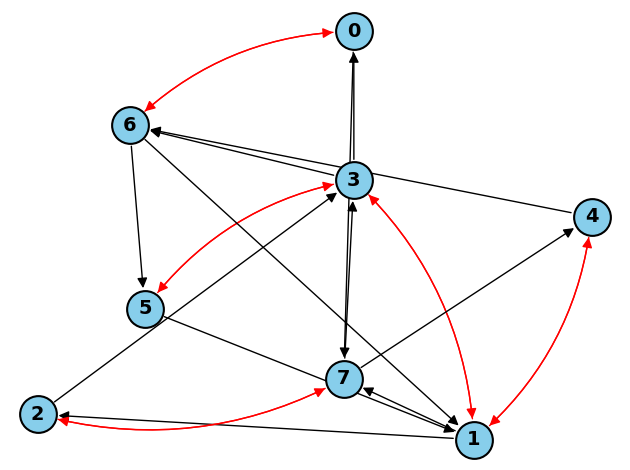

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
from matplotlib.patches import FancyArrowPatch

def plot_graph_from_multiplication_table(M, table_index):
    """
    Constructs and plots a graph based on the given multiplication table M.

    Parameters:
    - M: A list of lists representing the multiplication table.
         M[i][j] represents the result of i * j.
    - table_index: An integer representing the index of the multiplication table (used for saving plots).
    """
    n = len(M)  # Number of nodes
    edges = []

    # Construct edges based on the multiplication table
    for i in range(n):
        for j in range(n):
            k = M[i][j]  # Compute i * j
            edges.append((i, k))
            edges.append((k, j))

    # Create a MultiDiGraph to allow multiple edges between nodes
    G = nx.MultiDiGraph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges)

    # Define positions for all nodes using a layout
    pos = nx.spring_layout(G, seed=42)  # Fixed seed for consistent layout

    # Draw nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black', linewidths=1.5)
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    ax = plt.gca()

    # Prepare a set to keep track of drawn edges
    drawn_edges = set()

    # Iterate over all edges to draw them
    for u, v in G.edges():
        # Avoid drawing the same edge multiple times
        if (u, v) in drawn_edges:
            continue

        # Check if there is a reverse edge (bidirectional)
        if G.has_edge(v, u) and (v, u) not in drawn_edges:
            # Bidirectional edge
            # Draw both edges in red with opposite curvature
            rad = 0.2  # Curvature radius

            # Edge from u to v
            arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                    arrowstyle='-|>',
                                    mutation_scale=15,
                                    color='red',
                                    lw=1,
                                    connectionstyle=f"arc3,rad={rad}",
                                    shrinkA=15,
                                    shrinkB=15)
            ax.add_patch(arrow)

            # Edge from v to u
            arrow_rev = FancyArrowPatch(posA=pos[v], posB=pos[u],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='red',
                                        lw=1,
                                        connectionstyle=f"arc3,rad={-rad}",
                                        shrinkA=15,
                                        shrinkB=15)
            ax.add_patch(arrow_rev)

            # Mark both edges as drawn
            drawn_edges.add((u, v))
            drawn_edges.add((v, u))
        else:
            # Unidirectional edge or self-loop
            if u == v:
                # Self-loop as a bent edge
                rad = 0.3  # Curvature radius for self-loops
                arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='black',
                                        lw=1,
                                        connectionstyle=f"arc3,rad={rad}",
                                        shrinkA=15,
                                        shrinkB=15)
                ax.add_patch(arrow)
            else:
                # Unidirectional edge
                arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='black',
                                        lw=1,
                                        connectionstyle="arc3,rad=0",
                                        shrinkA=15,
                                        shrinkB=15)
                ax.add_patch(arrow)

            # Mark edge as drawn
            drawn_edges.add((u, v))

    # Remove axes for clarity
    plt.axis('off')

    # Adjust plot margins
    plt.tight_layout()

    # Save the graph to a file
    plt.savefig(f'graph_{table_index}_8x8.png', format='png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.close()

def read_multiplication_tables_from_file(filename):
    """
    Reads multiplication tables from a file, one per row, where each table is in list format.

    Parameters:
    - filename: The name of the file containing multiplication tables.

    Returns:
    - A list of multiplication tables, where each table is a list of lists.
    """
    multiplication_tables = []
    with open(filename, 'r') as file:
        for line_number, line in enumerate(file, 1):
            try:
                # Safely evaluate the line as a Python literal (list of lists)
                M = ast.literal_eval(line.strip())
                # Validate that M is a list of lists and is square
                if (isinstance(M, list) and all(isinstance(row, list) for row in M)):
                    n = len(M)
                    if all(len(row) == n for row in M):
                        multiplication_tables.append(M)
                    else:
                        print(f"Error on line {line_number}: Not all rows have length {n}.")
                else:
                    print(f"Error on line {line_number}: The line is not a list of lists.")
            except (SyntaxError, ValueError) as e:
                print(f"Error on line {line_number}: {e}")
    return multiplication_tables

def main():
    # File containing multiplication tables (one per row in list format)
    filename = 'magmas8x8(WIP).txt'
    # Read multiplication tables from the file
    multiplication_tables = read_multiplication_tables_from_file(filename)

    # Plot each multiplication table
    for index, M in enumerate(multiplication_tables, 1):
        plot_graph_from_multiplication_table(M, index)
        print(f"Graph {index} plotted and saved as 'graph_{index}.png'.")

if __name__ == '__main__':
    main()

Graph 1 plotted and saved as 'graph_1.png'.
Graph 2 plotted and saved as 'graph_2.png'.
Graph 3 plotted and saved as 'graph_3.png'.
Graph 4 plotted and saved as 'graph_4.png'.
Graph 5 plotted and saved as 'graph_5.png'.
Graph 6 plotted and saved as 'graph_6.png'.
Graph 7 plotted and saved as 'graph_7.png'.
Graph 8 plotted and saved as 'graph_8.png'.
Graph 9 plotted and saved as 'graph_9.png'.
Graph 10 plotted and saved as 'graph_10.png'.
Graph 11 plotted and saved as 'graph_11.png'.
Graph 12 plotted and saved as 'graph_12.png'.
Graph 13 plotted and saved as 'graph_13.png'.
Graph 14 plotted and saved as 'graph_14.png'.
Graph 15 plotted and saved as 'graph_15.png'.
Graph 16 plotted and saved as 'graph_16.png'.
Graph 17 plotted and saved as 'graph_17.png'.
Graph 18 plotted and saved as 'graph_18.png'.
Graph 19 plotted and saved as 'graph_19.png'.
Graph 20 plotted and saved as 'graph_20.png'.
Graph 21 plotted and saved as 'graph_21.png'.
Graph 22 plotted and saved as 'graph_22.png'.
Graph 

KeyboardInterrupt: 

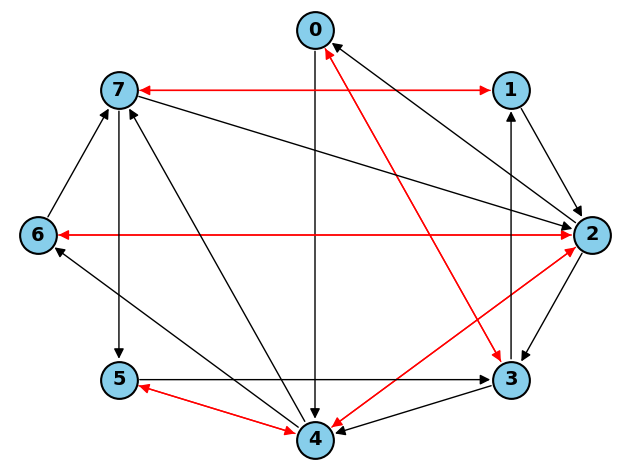

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
from matplotlib.patches import FancyArrowPatch
import math

def plot_graph_from_multiplication_table(M, table_index):
    """
    Constructs and plots a graph based on the given multiplication table M.

    Parameters:
    - M: A list of lists representing the multiplication table.
         M[i][j] represents the result of i * j.
    - table_index: An integer representing the index of the multiplication table (used for saving plots).
    """
    n = len(M)  # Number of nodes, should be 8 as per your note
    edges = []

    # Construct edges based on the multiplication table
    for i in range(n):
        for j in range(n):
            k = M[i][j]  # Compute i * j
            edges.append((i, k))
            edges.append((k, j))

    # Create a MultiDiGraph to allow multiple edges between nodes
    G = nx.MultiDiGraph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges)

    # Define fixed positions for nodes from 0 to 7 counterclockwise
    pos = {}
    for i in range(n):
        angle = math.pi / 2 - (2 * math.pi * i) / n  # Start from pi/2 and go counterclockwise
        x = math.cos(angle)
        y = math.sin(angle)
        pos[i] = (x, y)

    # Draw nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black', linewidths=1.5)
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    ax = plt.gca()

    # Prepare a set to keep track of drawn edges
    drawn_edges = set()

    # Iterate over all edges to draw them
    for u, v in G.edges():
        # Avoid drawing the same edge multiple times
        if (u, v) in drawn_edges:
            continue

        # Check if there is a reverse edge (bidirectional)
        if G.has_edge(v, u) and (v, u) not in drawn_edges:
            # Bidirectional edge
            # Draw both edges as straight lines in red
            # Edge from u to v
            arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                    arrowstyle='-|>',
                                    mutation_scale=15,
                                    color='red',
                                    lw=1,
                                    connectionstyle="arc3,rad=0",
                                    shrinkA=15,
                                    shrinkB=15)
            ax.add_patch(arrow)

            # Edge from v to u
            arrow_rev = FancyArrowPatch(posA=pos[v], posB=pos[u],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='red',
                                        lw=1,
                                        connectionstyle="arc3,rad=0",
                                        shrinkA=15,
                                        shrinkB=15)
            ax.add_patch(arrow_rev)

            # Mark both edges as drawn
            drawn_edges.add((u, v))
            drawn_edges.add((v, u))
        else:
            # Unidirectional edge or self-loop
            if u == v:
                # Self-loop as a bent edge
                rad = 0.3  # Curvature radius for self-loops
                arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='black',
                                        lw=1,
                                        connectionstyle=f"arc3,rad={rad}",
                                        shrinkA=15,
                                        shrinkB=15)
                ax.add_patch(arrow)
            else:
                # Unidirectional edge
                arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='black',
                                        lw=1,
                                        connectionstyle="arc3,rad=0",
                                        shrinkA=15,
                                        shrinkB=15)
                ax.add_patch(arrow)

            # Mark edge as drawn
            drawn_edges.add((u, v))

    # Remove axes for clarity
    plt.axis('off')

    # Adjust plot margins
    plt.tight_layout()

    # Save the graph to a file
    plt.savefig(f'graph_{table_index}_8x8.png', format='png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.close()

def read_multiplication_tables_from_file(filename):
    """
    Reads multiplication tables from a file, one per row, where each table is in list format.

    Parameters:
    - filename: The name of the file containing multiplication tables.

    Returns:
    - A list of multiplication tables, where each table is a list of lists.
    """
    multiplication_tables = []
    with open(filename, 'r') as file:
        for line_number, line in enumerate(file, 1):
            try:
                # Safely evaluate the line as a Python literal (list of lists)
                M = ast.literal_eval(line.strip())
                # Validate that M is a list of lists and is square
                if (isinstance(M, list) and all(isinstance(row, list) for row in M)):
                    n = len(M)
                    if n == 8 and all(len(row) == n for row in M):
                        multiplication_tables.append(M)
                    else:
                        print(f"Error on line {line_number}: The table must be 8x8.")
                else:
                    print(f"Error on line {line_number}: The line is not a list of lists.")
            except (SyntaxError, ValueError) as e:
                print(f"Error on line {line_number}: {e}")
    return multiplication_tables

def main():
    # File containing multiplication tables (one per row in list format)
    filename = 'magmas8x8(WIP).txt'

    # Read multiplication tables from the file
    multiplication_tables = read_multiplication_tables_from_file(filename)

    # Plot each multiplication table
    for index, M in enumerate(multiplication_tables, 1):
        plot_graph_from_multiplication_table(M, index)
        print(f"Graph {index} plotted and saved as 'graph_{index}.png'.")

if __name__ == '__main__':
    main()

Graph 1 data saved as 'graph_1.pkl'.
Graph 1 plotted and saved as 'graph_1_8x8.png'.
Graph 2 data saved as 'graph_2.pkl'.
Graph 2 plotted and saved as 'graph_2_8x8.png'.
Graph 3 data saved as 'graph_3.pkl'.
Graph 3 plotted and saved as 'graph_3_8x8.png'.
Graph 4 data saved as 'graph_4.pkl'.
Graph 4 plotted and saved as 'graph_4_8x8.png'.
Graph 5 data saved as 'graph_5.pkl'.
Graph 5 plotted and saved as 'graph_5_8x8.png'.
Graph 6 data saved as 'graph_6.pkl'.
Graph 6 plotted and saved as 'graph_6_8x8.png'.
Graph 7 data saved as 'graph_7.pkl'.
Graph 7 plotted and saved as 'graph_7_8x8.png'.
Graph 8 data saved as 'graph_8.pkl'.
Graph 8 plotted and saved as 'graph_8_8x8.png'.
Graph 9 data saved as 'graph_9.pkl'.
Graph 9 plotted and saved as 'graph_9_8x8.png'.
Graph 10 data saved as 'graph_10.pkl'.
Graph 10 plotted and saved as 'graph_10_8x8.png'.
Graph 11 data saved as 'graph_11.pkl'.
Graph 11 plotted and saved as 'graph_11_8x8.png'.
Graph 12 data saved as 'graph_12.pkl'.
Graph 12 plotted a

KeyboardInterrupt: 

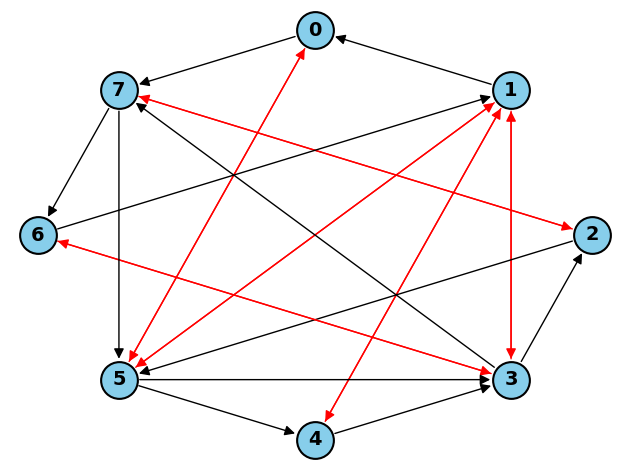

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
from matplotlib.patches import FancyArrowPatch
import math
import pickle  # Import the pickle module

def plot_graph_from_multiplication_table(M, table_index):
    """
    Constructs and plots a graph based on the given multiplication table M.
    Also saves the graph object to a file for later use.

    Parameters:
    - M: A list of lists representing the multiplication table.
         M[i][j] represents the result of i * j.
    - table_index: An integer representing the index of the multiplication table (used for saving plots and graph files).
    """
    n = len(M)  # Number of nodes, should be 8 as per your note
    edges = []

    # Construct edges based on the multiplication table
    for i in range(n):
        for j in range(n):
            k = M[i][j]  # Compute i * j
            edges.append((i, k))
            edges.append((k, j))

    # Create a MultiDiGraph to allow multiple edges between nodes
    G = nx.MultiDiGraph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges)

    # Save the graph to a file using pickle
    graph_filename = f'graph_{table_index}.pkl'
    with open(graph_filename, 'wb') as f:
        pickle.dump(G, f)
    print(f"Graph {table_index} data saved as '{graph_filename}'.")

    # Define fixed positions for nodes from 0 to 7 counterclockwise
    pos = {}
    for i in range(n):
        angle = math.pi / 2 - (2 * math.pi * i) / n  # Start from pi/2 and go counterclockwise
        x = math.cos(angle)
        y = math.sin(angle)
        pos[i] = (x, y)

    # Draw nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black', linewidths=1.5)
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    ax = plt.gca()

    # Prepare a set to keep track of drawn edges
    drawn_edges = set()

    # Iterate over all edges to draw them
    for u, v in G.edges():
        # Avoid drawing the same edge multiple times
        if (u, v) in drawn_edges:
            continue

        # Check if there is a reverse edge (bidirectional)
        if G.has_edge(v, u) and (v, u) not in drawn_edges:
            # Bidirectional edge
            # Draw both edges as straight lines in red
            # Edge from u to v
            arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                    arrowstyle='-|>',
                                    mutation_scale=15,
                                    color='red',
                                    lw=1,
                                    connectionstyle="arc3,rad=0",
                                    shrinkA=15,
                                    shrinkB=15)
            ax.add_patch(arrow)

            # Edge from v to u
            arrow_rev = FancyArrowPatch(posA=pos[v], posB=pos[u],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='red',
                                        lw=1,
                                        connectionstyle="arc3,rad=0",
                                        shrinkA=15,
                                        shrinkB=15)
            ax.add_patch(arrow_rev)

            # Mark both edges as drawn
            drawn_edges.add((u, v))
            drawn_edges.add((v, u))
        else:
            # Unidirectional edge or self-loop
            if u == v:
                # Self-loop as a bent edge
                rad = 0.3  # Curvature radius for self-loops
                arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='black',
                                        lw=1,
                                        connectionstyle=f"arc3,rad={rad}",
                                        shrinkA=15,
                                        shrinkB=15)
                ax.add_patch(arrow)
            else:
                # Unidirectional edge
                arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                        arrowstyle='-|>',
                                        mutation_scale=15,
                                        color='black',
                                        lw=1,
                                        connectionstyle="arc3,rad=0",
                                        shrinkA=15,
                                        shrinkB=15)
                ax.add_patch(arrow)

            # Mark edge as drawn
            drawn_edges.add((u, v))

    # Remove axes for clarity
    plt.axis('off')

    # Adjust plot margins
    plt.tight_layout()

    # Save the graph image to a file
    image_filename = f'graph_{table_index}_8x8.png'
    plt.savefig(image_filename, format='png', bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.close()
    print(f"Graph {table_index} plotted and saved as '{image_filename}'.")

def read_multiplication_tables_from_file(filename):
    """
    Reads multiplication tables from a file, one per row, where each table is in list format.

    Parameters:
    - filename: The name of the file containing multiplication tables.

    Returns:
    - A list of multiplication tables, where each table is a list of lists.
    """
    multiplication_tables = []
    with open(filename, 'r') as file:
        for line_number, line in enumerate(file, 1):
            try:
                # Safely evaluate the line as a Python literal (list of lists)
                M = ast.literal_eval(line.strip())
                # Validate that M is a list of lists and is square
                if (isinstance(M, list) and all(isinstance(row, list) for row in M)):
                    n = len(M)
                    if n == 8 and all(len(row) == n for row in M):
                        multiplication_tables.append(M)
                    else:
                        print(f"Error on line {line_number}: The table must be 8x8.")
                else:
                    print(f"Error on line {line_number}: The line is not a list of lists.")
            except (SyntaxError, ValueError) as e:
                print(f"Error on line {line_number}: {e}")
    return multiplication_tables

def main():
    # File containing multiplication tables (one per row in list format)
    filename = 'magmas8x8(WIP).txt'

    # Read multiplication tables from the file
    multiplication_tables = read_multiplication_tables_from_file(filename)

    # Plot each multiplication table and save graphs to files
    for index, M in enumerate(multiplication_tables, 1):
        plot_graph_from_multiplication_table(M, index)

if __name__ == '__main__':
    main()